In [34]:
#packages
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
from sklearn import tree
from matplotlib import pyplot as plt
import seaborn as sns

import graphviz
import pydotplus
import io
from scipy import misc
from IPython.display import Image

%matplotlib inline

#loading input csv file
data = pd.read_csv('../IDA_Assignment1/Biomechanical_Data_column_2C_weka.csv')
len(data)
data.shape
#data1

(310, 7)

In [35]:
FirstColumn = pd.qcut(data["pelvic_incidence"],4,labels=[0,1,2,3])

In [36]:
#FirstColumn

In [37]:
SecondColumn = pd.qcut(data["pelvic_tilt numeric"],4,labels=[0,1,2,3])

In [38]:
#SecondColumn

In [39]:
ThirdColumn = pd.qcut(data["lumbar_lordosis_angle"],4,labels=[0,1,2,3])

In [40]:
#ThirdColumn

In [41]:
FourthColumn = pd.qcut(data["sacral_slope"],4,labels=[0,1,2,3])

In [42]:
#FourthColumn

In [43]:
FifthColumn = pd.qcut(data["pelvic_radius"],4,labels=[0,1,2,3])

In [44]:
#FifthColumn

In [45]:
SixthColumn = pd.qcut(data["degree_spondylolisthesis"],4,labels=[0,1,2,3])

In [46]:
#SixthColumn

In [47]:
target_map = {'Abnormal':0, 'Normal':1 }
SeventhColumn = data['class'].apply(lambda x: target_map[x])


In [48]:
#SeventhColumn

In [49]:
MData = pd.concat([FirstColumn,SecondColumn,ThirdColumn,FourthColumn,FifthColumn,SixthColumn,SeventhColumn],axis=1)

In [50]:
#MData

In [51]:
train,test = train_test_split(MData,test_size=0.3225,random_state=210)
print("Training size:{} ; Test size:{}".format(len(train), len(test)))
#train

Training size:210 ; Test size:100


In [52]:
c = DecisionTreeClassifier(criterion="entropy",min_samples_leaf=8,random_state=210)
featuresList = ["pelvic_incidence","pelvic_tilt numeric","lumbar_lordosis_angle","sacral_slope","pelvic_radius","degree_spondylolisthesis"]
X_train = train[featuresList]
Y_train = train["class"]

X_test = test[featuresList]
Y_test = test["class"]

In [53]:
dt = c.fit(X_train, Y_train)

In [54]:
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree,out_file=f,feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = misc.imread(path)
    plt.rcParams["figure.figsize"] = (20,20)
    plt.imshow(img)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


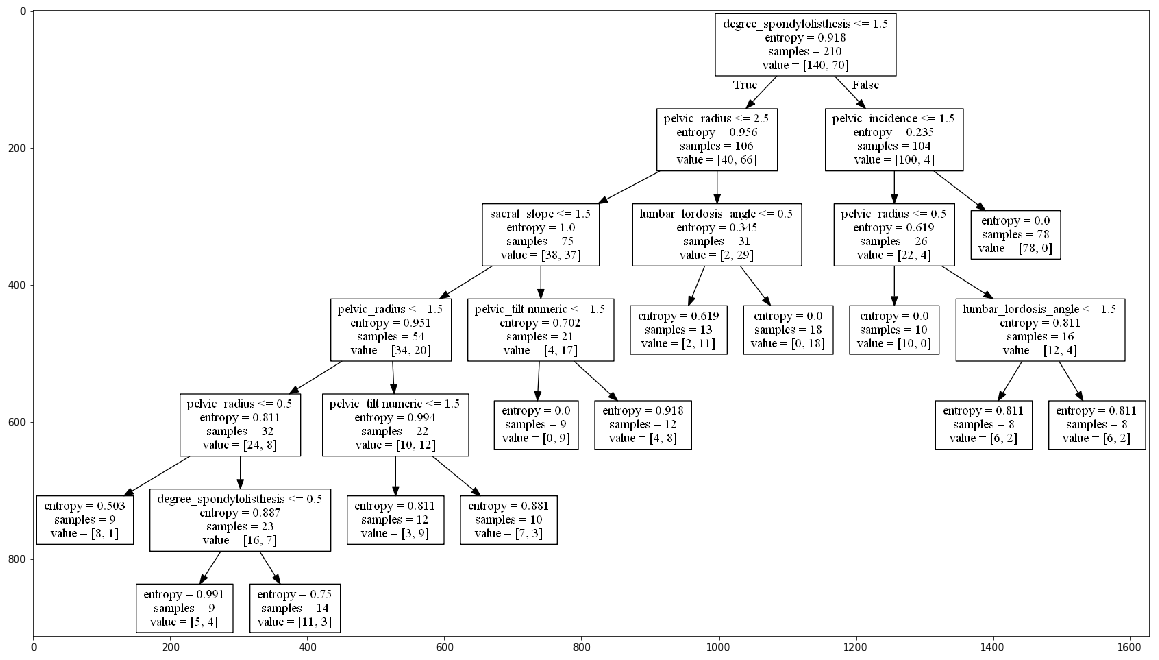

In [55]:
show_tree(dt,featuresList,'./DecisionTrees/3a/3a_DecisionTree_LeafSamples_8.png')

In [56]:
Y_pred = c.predict(X_test)

In [57]:
Y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [58]:
print('Test Accuracy Score : ',accuracy_score(Y_test,Y_pred)*100)

Test Accuracy Score :  83.0


In [59]:
Y_pred_t = c.predict(X_train)

In [60]:
Y_pred_t

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [61]:
print('Train Accuracy Score : ',accuracy_score(Y_train,Y_pred_t)*100)

Train Accuracy Score :  88.57142857142857


In [62]:
print('Confusion Matrix : ',confusion_matrix(Y_test,Y_pred))

Confusion Matrix :  [[62  8]
 [ 9 21]]


In [63]:
print('Classification Report : ',classification_report(Y_test,Y_pred))

Classification Report :               precision    recall  f1-score   support

          0       0.87      0.89      0.88        70
          1       0.72      0.70      0.71        30

avg / total       0.83      0.83      0.83       100



In [64]:
print('Precision Score : ',precision_score(Y_test,Y_pred,average='macro')*100)

Precision Score :  79.86886838271006


In [65]:
print('Recall Score : ',recall_score(Y_test,Y_pred,average='macro')*100)

Recall Score :  79.28571428571428


In [66]:
print('f1 Score : ',f1_score(Y_test,Y_pred,average='macro')*100)

f1 Score :  79.5648515446568
